#  In-class Labexercise
## Case-study 1 ( KNN)

### 1.1 Load the libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 
import scipy.stats as st

### 1.2 Read the dataset(PlayTennis.csv):

In [2]:
df=pd.read_csv('C:/Users/HP/Downloads/SLC-InClass-Day3Folder/PlayTennis.csv')
df.shape

(14, 5)

In [3]:
df

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


### 1.3 Use the  LabelEncoder(Concerting categarical to Numarical data)

In [4]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
for cols in df.columns:
    df[cols]=lb.fit_transform(df[cols])

In [5]:
df

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,2,1,0,1,0
1,2,1,0,0,0
2,0,1,0,1,1
3,1,2,0,1,1
4,1,0,1,1,1
5,1,0,1,0,0
6,0,0,1,0,1
7,2,2,0,1,0
8,2,0,1,1,1
9,1,2,1,1,1


### 1.4 Extract the independent variable X and dependent variable Y?

In [6]:
X=df.drop('Play Tennis',axis=1)
y=df['Play Tennis']

### 1.5 Visualize the data:(countplot)

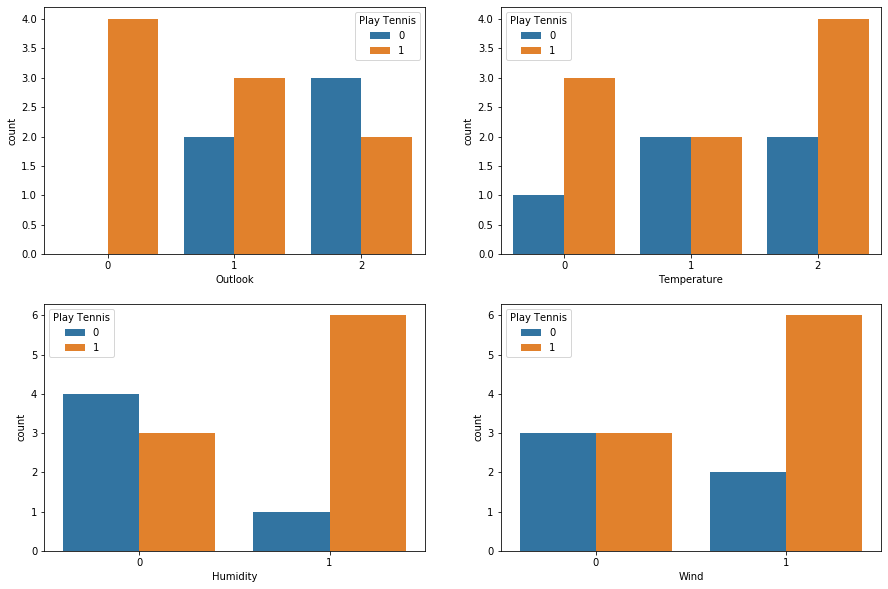

In [7]:
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.countplot(x='Outlook',hue='Play Tennis',data=df)
plt.subplot(222)
sns.countplot(x='Temperature',hue='Play Tennis',data=df)
plt.subplot(223)
sns.countplot(x='Humidity',hue='Play Tennis',data=df)
plt.subplot(224)
sns.countplot(x='Wind',hue='Play Tennis',data=df)
plt.show()

### 1.6 Split the data into train and test set:(70/30)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### 1.7 Train a knn

In [10]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()
X_trains=std.fit_transform(X_train)
X_tests=std.transform(X_test)

In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_trains,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### 1.8 Predict the model:

In [12]:
y_train_pred=knn.predict(X_trains) #It will give 01 instead of probability using by default cutoff 0.5
y_train_prob=knn.predict_proba(X_trains)[:,1]

y_test_pred=knn.predict(X_tests)
y_test_prob=knn.predict_proba(X_tests)[:,1]

### 1.9 Evaluation the model:(classification_report)

Confusion Matrix - Train:  
 [[3 0]
 [2 4]]
Accuracy Score - Train:  0.7777777777777778
Classification Report - Train:                precision    recall  f1-score   support

           0       0.60      1.00      0.75         3
           1       1.00      0.67      0.80         6

    accuracy                           0.78         9
   macro avg       0.80      0.83      0.77         9
weighted avg       0.87      0.78      0.78         9

AUC Score - Train:  0.8333333333333333



Confusion Matrix - Test:  
 [[0 2]
 [0 3]]
Accuracy Score - Test:  0.6
Classification Report - Test:                precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.60      1.00      0.75         3

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.37         5
weighted avg       0.36      0.60      0.45         5

AUC Score - Test:  0.6666666666666666




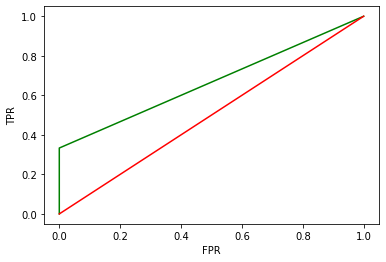

In [13]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve

print('Confusion Matrix - Train: ', '\n',confusion_matrix(y_train,y_train_pred))
print('Accuracy Score - Train: ', accuracy_score(y_train,y_train_pred))
print('Classification Report - Train: ', classification_report(y_train,y_train_pred))
print('AUC Score - Train: ', roc_auc_score(y_train,y_train_prob))

print('\n'*2)

print('Confusion Matrix - Test: ', '\n',confusion_matrix(y_test,y_test_pred))
print('Accuracy Score - Test: ', accuracy_score(y_test,y_test_pred))
print('Classification Report - Test: ', classification_report(y_test,y_test_pred))
print('AUC Score - Test: ', roc_auc_score(y_test,y_test_prob))

print('\n')

fpr,tpr,thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr,'g')
plt.plot(fpr,fpr,'r-')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# Case-study 2  (NB)

### 2.1 Importing the dataset(pima-indians-diabetes.data)

In [14]:
df1=pd.read_csv('pima-indians-diabetes.data',names=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin',
                                                     'BMI','DiabetesPedigreeFunction','Age','Outcome'])

In [15]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
df1.shape

(768, 9)

### 2.2 Find out the feature columns

In [17]:
X=df1.drop('Outcome',axis=1)

In [18]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

### 2.3 Extract the independent variable X and dependent variable Y?

In [19]:
y=df1['Outcome']

### 2.4 Split the data into train and test set:(70/30)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 2.5 Train a GaussianNB?

In [21]:
from sklearn.naive_bayes import GaussianNB

In [22]:
gbnb=GaussianNB()
gbnb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### 2.6 Predict the model:

In [23]:
y_train_pred=gbnb.predict(X_train)
y_train_prob=gbnb.predict_proba(X_train)[:,1]
y_test_pred=gbnb.predict(X_test)
y_test_prob=gbnb.predict_proba(X_test)[:,1]

from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,roc_curve,classification_report

In [24]:
print('Confusion Matrix - Train: ', '\n',confusion_matrix(y_train,y_train_pred))
print('Accuracy Score - Train: ', accuracy_score(y_train,y_train_pred))
print('Classification Report - Train: ', classification_report(y_train,y_train_pred))
print('AUC Score - Train: ', roc_auc_score(y_train,y_train_prob))

print('\n'*2)

print('Confusion Matrix - Test: ', '\n',confusion_matrix(y_test,y_test_pred))
print('Accuracy Score - Test: ', accuracy_score(y_test,y_test_pred))
print('Classification Report - Test: ', classification_report(y_test,y_test_pred))
print('AUC Score - Test: ', roc_auc_score(y_test,y_test_prob))

print('\n')
fpr,tpr,thresholds=roc_curve(y_test,y_test_prob)
plt.plot(fpr,tpr,'g')
plt.plot(fpr,fpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

Confusion Matrix - Train:  
 [[302  47]
 [ 78 110]]
Accuracy Score - Train:  0.7672253258845437
Classification Report - Train:                precision    recall  f1-score   support

           0       0.79      0.87      0.83       349
           1       0.70      0.59      0.64       188

    accuracy                           0.77       537
   macro avg       0.75      0.73      0.73       537
weighted avg       0.76      0.77      0.76       537

AUC Score - Train:  0.8293452417240749



Confusion Matrix - Test:  
 [[119  32]
 [ 27  53]]
Accuracy Score - Test:  0.7445887445887446
Classification Report - Test:                precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231

AUC Score - Test:  0.7904801324503311


### 2.7 Evaluation the model:(classification_report)

In [25]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80       151
           1       0.62      0.66      0.64        80

    accuracy                           0.74       231
   macro avg       0.72      0.73      0.72       231
weighted avg       0.75      0.74      0.75       231



### 2.8 Conclusion:



The model is slightly overfiting as the AUC score for train is 0.83 and that for test is 0.79. The accuracy of the model is 74% which can be further imporoved by hyper parameter tuning

### 2.9 Confusion matrix

In [26]:
# this produces a 2x2 numpy array (matrix)
print('Confusion Matrix - Test: ', '\n',confusion_matrix(y_test,y_test_pred))

Confusion Matrix - Test:  
 [[119  32]
 [ 27  53]]


### 2.10 what is Basic terminology For Confusion matrix?

True Positives (TP): 53

True Negatives (TN): 119

False Positives (FP): 32

* Falsely predict positive

Type I error

False Negatives (FN): 27


* Falsely predict negative

Type II error

0: negative class 

1: positive class 32

### 2.11 print the first 25 true and predicted responses

In [43]:
s1=pd.Series(y_test.values,name='Y-Actual')
s1

0      0
1      0
2      0
3      0
4      0
      ..
226    1
227    1
228    0
229    0
230    0
Name: Y-Actual, Length: 231, dtype: int64

In [44]:
s2=pd.Series(y_test_pred,name='Y-Predicted')
s2

0      0
1      0
2      0
3      0
4      1
      ..
226    0
227    0
228    0
229    0
230    0
Name: Y-Predicted, Length: 231, dtype: int64

In [45]:
tp=pd.concat([s1,s2],axis=1).reset_index(drop=True)
tp

,Y-Actual,Y-Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1
...,...,...
226,1,0
227,1,0
228,0,0
229,0,0


In [46]:
tp[tp['Y-Actual']==tp['Y-Predicted']].head(25)

,Y-Actual,Y-Predicted
0,0,0
1,0,0
2,0,0
3,0,0
6,0,0
7,0,0
8,0,0
12,1,1
13,0,0
14,0,0


### 2.12 save confusion matrix and slice into four pieces

In [48]:
conf=confusion_matrix(y_test,y_test_pred)
conf

array([[119,  32],
       [ 27,  53]], dtype=int64)

In [52]:
TN=conf[0][0]
FP=conf[0][1]
FN=conf[1][0]
TP=conf[1][1]
(TN,FP,FN,TP)

(119, 32, 27, 53)

### 2.13 Metrics computed from a confusion matrix

Classification Accuracy: Overall, how often is the classifier correct?

In [53]:
Accuracy=(TN+TP)/(TN+FP+FN+TP)
Accuracy

0.7445887445887446

Classification Error: Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate"

In [54]:
Misclassification_Rate=1-Accuracy
Misclassification_Rate

0.2554112554112554

Sensitivity: When the actual value is positive, how often is the prediction correct?



In [63]:
Sensitivity=TP/(TP+FN)
Sensitivity

0.6625

Specificity: When the actual value is negative, how often is the prediction correct?

In [64]:
Specificity=1-Sensitivity
Specificity

0.3375

False Positive Rate: When the actual value is negative, how often is the prediction incorrect?

In [62]:
FPR=FP/(FP+TN)
FPR

0.2119205298013245

Precision: When a positive value is predicted, how often is the prediction correct?

How "precise" is the classifier when predicting positive instances?

In [61]:
Precision=TP/(TP+FP)
Precision

0.6235294117647059

### 2.14 Adjusting the classification threshold?

#### print the first 10 predicted responses?

In [65]:
prob=pd.DataFrame({'Y_Actual':y_test,'Y_Predicted':y_test_pred,'Y_prob':y_test_prob})

#### print the first 10 predicted probabilities of class membership

In [66]:
prob.head(10)

,Y_Actual,Y_Predicted,Y_prob
668,0,0,0.261841
324,0,0,0.059721
624,0,0,0.027572
690,0,0,0.171599
473,0,1,0.528465
204,0,1,0.527255
97,0,0,0.003923
336,0,0,0.300749
568,0,0,0.461619
148,0,1,0.749955


#### print the first 10 predicted probabilities for class 1

In [68]:
prob_10=prob[prob['Y_Actual']==1].head(10)
prob_10

,Y_Actual,Y_Predicted,Y_prob
667,1,0,0.252438
199,1,1,0.721525
356,1,0,0.298249
604,1,1,0.762454
213,1,0,0.304662
209,1,1,0.957887
328,1,0,0.172713
120,1,1,0.944268
363,1,1,0.833587
425,1,1,0.978929


#### store the predicted probabilities for class 1

In [ ]:
prob_10

#### plot histogram of predicted probabilities

#### create 8 bins

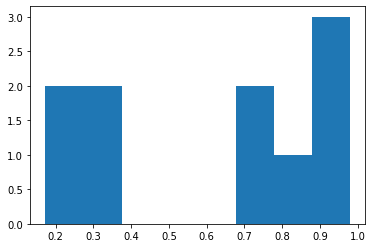

In [69]:
plt.hist(prob_10['Y_prob'],bins=8)
plt.show()

### print the first 10 predicted probabilities

In [70]:
prob_10

,Y_Actual,Y_Predicted,Y_prob
667,1,0,0.252438
199,1,1,0.721525
356,1,0,0.298249
604,1,1,0.762454
213,1,0,0.304662
209,1,1,0.957887
328,1,0,0.172713
120,1,1,0.944268
363,1,1,0.833587
425,1,1,0.978929


### create new confusion matrix 

### 2.14 Receiver Operating Characteristic (ROC) Curves

#### define a function that accepts a threshold and prints sensitivity and specificity

In [71]:
def scores(threshold,yactual,y_predprob):
    fpr,tpr,thresholds=roc_curve(yactual,y_predprob)
    score=pd.DataFrame({'FPR':fpr,'TPR':tpr,'Threshold':thresholds})
    df1=score.loc[score['Threshold']>=threshold,['Threshold','FPR','TPR']]
    df1['Specificity']=1-df1['FPR']
    return (df1.tail(1))

In [72]:
scores(0.4,prob['Y_Actual'],prob['Y_prob'])

,Threshold,FPR,TPR,Specificity
32,0.550733,0.178808,0.6625,0.821192


# 3. What is advantages Confusion matrix and ROC/AUC?

1. Confusion Matrix helps us to determin the FPR and TPR as well as the Accuracy.
2. ROC/AUC tells us the quality of the model. A junk model has AUC equal to 0.5 and the best model has the score equal to 1